In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [3]:
df = pd.read_excel('WQ_updated_with_WQI.xlsx')

In [4]:
df_x = df.drop(columns = ['WRIS ID', 'WQI', 'GRADE', 'QUALITY'])
df_y = df['GRADE']

In [5]:
df_x

,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness
0,8.340,355.00,160.000,22.0000,18.225000,25.70,1.2880,17.725000,3.210000,3.6300,0.37,217.748,129.722500
1,8.460,596.00,205.000,14.0000,20.655000,75.67,0.1250,38.995000,46.220000,2.4600,0.24,360.745,119.685500
2,8.240,429.00,150.000,10.0000,32.805000,23.32,0.1830,31.905000,24.150000,0.0600,0.68,243.370,159.500500
3,8.210,1077.00,165.000,18.0000,70.470000,85.95,0.1200,124.075000,47.480000,184.2000,0.16,681.918,333.927000
4,8.170,394.00,135.000,14.0000,34.020000,15.24,0.6480,38.995000,8.220000,0.3000,0.62,233.172,174.482000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,7.482,340.70,40.032,8.0064,3.636893,32.16,0.0300,42.540000,9.360800,5.0385,0.12,170.800,34.927261
2261,7.416,162.30,55.000,10.0000,10.922330,5.62,2.0500,17.494575,10.035882,1.1000,0.13,76.560,69.781553
2262,7.092,199.56,50.000,26.0000,12.135922,18.48,0.0600,52.493025,31.239580,0.7000,0.19,95.730,114.757282
2263,6.743,173.20,25.020,14.0112,8.488350,16.18,0.0292,53.175000,4.373400,0.5268,1.10,90.720,69.830233


### Scaling down parameters

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(df_x)

StandardScaler()

In [8]:
scaled_features = scaler.transform(df_x)
scaled_features

array([[ 0.97626931, -0.59150839, -0.58473211, ..., -0.42554783,
        -0.59103139, -0.51487383],
       [ 1.21778134, -0.48719768, -0.36484523, ..., -0.54802722,
        -0.4969939 , -0.53679306],
       [ 0.77500928, -0.55947937, -0.63359585, ..., -0.13348161,
        -0.57418189, -0.44984339],
       ...,
       [-1.53545586, -0.65878663, -1.12223335, ..., -0.59513467,
        -0.6712727 , -0.54755551],
       [-2.23785336, -0.67019588, -1.244295  , ...,  0.26222102,
        -0.67456737, -0.64566908],
       [-0.64789913, -0.67647184, -1.12223335, ..., -0.57629169,
        -0.66534624, -0.72183882]])

In [9]:
df_x.columns

Index(['PH', 'EC', 'TOT_ALKALINITY', 'CA', 'MG', 'NA', 'FE', 'CHLORIDE',
       'SULPHATE', 'NITRATE', 'FLUORIDE', 'TDS', 'Total_hardness'],
      dtype='object')

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df_x.columns)
df_feat.head()

,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness
0,0.976269,-0.591508,-0.584732,-0.501819,-0.435089,-0.528786,0.251312,-0.437741,-0.535069,-0.433217,-0.425548,-0.591031,-0.514874
1,1.217781,-0.487198,-0.364845,-0.595174,-0.401292,-0.403927,-0.372065,-0.406486,-0.354569,-0.446153,-0.548027,-0.496994,-0.536793
2,0.775009,-0.559479,-0.633596,-0.641852,-0.232304,-0.534733,-0.340976,-0.416905,-0.447190,-0.472690,-0.133482,-0.574182,-0.449843
3,0.714631,-0.279009,-0.560300,-0.548497,0.291556,-0.378240,-0.374745,-0.281467,-0.349281,1.563344,-0.623399,-0.285785,-0.068923
4,0.634127,-0.574628,-0.706891,-0.595174,-0.215406,-0.554923,-0.091733,-0.406486,-0.514043,-0.470036,-0.190011,-0.580888,-0.417126


In [11]:
df_x = scaled_features

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

### Applying SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.30, random_state = 101)

In [15]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.astype('float'),y_train)

In [16]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_sm))

Before SMOTE : Counter({'E': 1007, 'C': 173, 'B': 170, 'D': 150, 'A': 85})
After SMOTE : Counter({'E': 1007, 'C': 1007, 'D': 1007, 'B': 1007, 'A': 1007})


In [17]:
k_range = list(range(1, 10))
params_knn = {'n_neighbors': k_range, 'weights': ['uniform', 'distance'], 'metric': ['eucladean', 'manhattan']} 

knn_gs = GridSearchCV(KNN, params_knn, verbose=3, cv=10, scoring='accuracy')
knn_gs.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 3/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 4/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 7/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 8/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 9/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV 1/10] END metric=eucladean, n_neighbors=1, weights=distance; total time=   0.0s
[CV 2/10] END metric=e

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'eucladean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'eucladean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

[CV 4/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 7/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 8/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 9/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/10] END metric=eucladean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 3/10] END metric=eucladean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 4/10] END metric=eucladean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=3, weights=uniform; total time=   0

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'eucladean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

[CV 1/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 3/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 4/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 7/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 8/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 9/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=4, weights=distance; total time=   0.0s
[CV 1/10] END metric=eucladean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=5, weights=uniform; total time= 

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'eucladean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

[CV 9/10] END metric=eucladean, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=6, weights=uniform; total time=   0.0s
[CV 1/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 3/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 4/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 7/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 8/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 9/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=6, weights=distance; total time=

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'eucladean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']

[CV 5/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 7/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 8/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 9/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 10/10] END metric=eucladean, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 1/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.0s
[CV 2/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.0s
[CV 3/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.0s
[CV 4/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.0s
[CV 5/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.0s
[CV 6/10] END metric=eucladean, n_neighbors=8, weights=distance; total time=   0.

[CV 8/10] END metric=manhattan, n_neighbors=4, weights=uniform; total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=4, weights=uniform; total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=4, weights=uniform; total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=4, weights=distance; total time=  

[CV 9/10] END metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=9, weights=distance; total time=

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.98113186 0.98113186 0.97100374 0.98113186 0.97298905 0.97656482
 0.96385299 0.97616681 0.96484821 0.97219658 0.95551256 0.97259262
 0.95511731 0.96981208 0.94578284 0.96961446 0.94399594 0.96504505]
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['eucladean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [18]:
#save best model
knn_best = knn_gs.best_estimator_#check best n_estimators value
print(knn_gs.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [19]:
pred_knn = knn_best.predict(X_test)
print(accuracy_score(y_test,pred_knn))
pd.crosstab(y_test,pred_knn) 

0.8573529411764705


col_0,A,B,C,D,E
GRADE,,,,,
A,27,2,0,0,0
B,12,57,14,0,0
C,1,18,52,10,1
D,0,3,10,40,3
E,1,0,2,20,407


In [20]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           A       0.66      0.93      0.77        29
           B       0.71      0.69      0.70        83
           C       0.67      0.63      0.65        82
           D       0.57      0.71      0.63        56
           E       0.99      0.95      0.97       430

    accuracy                           0.86       680
   macro avg       0.72      0.78      0.74       680
weighted avg       0.87      0.86      0.86       680



In [38]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train_sm, y_train_sm, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.9787469626684336, 0.9628569850736849, 0.9660339550001579, 0.9513383981823346, 0.9509431506200888, 0.9404170216794471, 0.9352539524756225, 0.9243337593486698, 0.9239369339518445, 0.9173865536937107, 0.9163893622392628, 0.9058656000504908, 0.9018945848717221, 0.894743444097321, 0.8933506106219824, 0.8858034333680458, 0.8854062135125755, 0.8762709457540471, 0.8766681656095174, 0.8687245574174003, 0.8693221622645083, 0.8607860771876676, 0.8601888667992046, 0.8534349458802739, 0.8506528290574016, 0.8472774464325161, 0.8472758685979361, 0.8435060273280948, 0.8439016693489855, 0.8381425731326327]


Text(0, 0.5, 'Cross-Validated Accuracy')

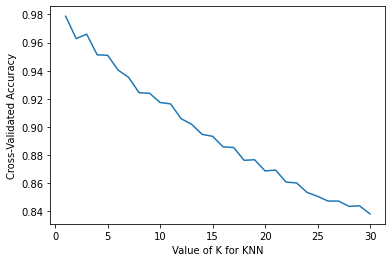

In [39]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Evaluating the model with ROC plot

In [24]:
random_probs = [0 for _ in range(len(y_test))]
knn_probs = knn_best.predict_proba(X_test)

In [38]:
import scikitplot as skplt

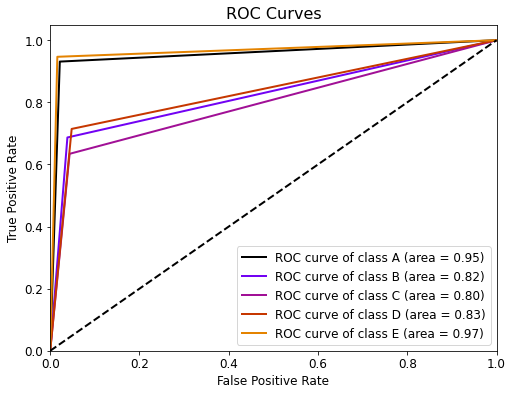

In [53]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=knn_probs, figsize=(8,6), cmap = 'gnuplot', text_fontsize=12,
                       title_fontsize=16,plot_micro=False,plot_macro=False)
plt.show()
